In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df_hs = pd.read_csv('housing.csv')
df_hs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### VERIFICANDO LA TABLA DE DATOS
## Para visualizar si hay datos faltantes, duplicados, etc.


In [3]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## LIMPIEZA DE DATOS.
# Eliminando campos con datos faltantes

In [4]:
df_hs.dropna(inplace=True)
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
df_hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print(f'Tamano del dataframe antes de eliminar las filas repetidas: {df_hs.shape}')
df_hs.drop_duplicates(inplace=True)
print(f'Tamano del dataframe despues de eliminar las filas repetidas: {df_hs.shape}')

Tamano del dataframe antes de eliminar las filas repetidas: (20433, 10)
Tamano del dataframe despues de eliminar las filas repetidas: (20433, 10)


## Verificar errores tipograficos en variables categoricas

C:\Users\Alex\AppData\Local\Temp\ipykernel_12812\2691579910.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


<function matplotlib.pyplot.show(close=None, block=None)>

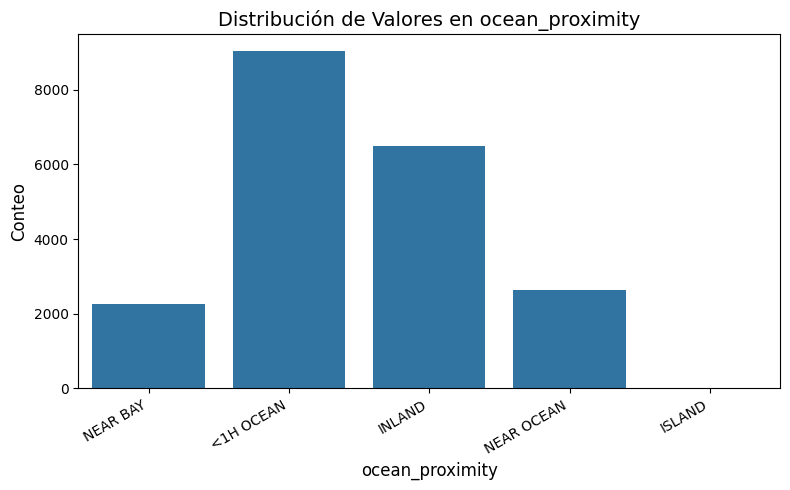

In [7]:
col_cat = 'ocean_proximity'
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(x=col_cat, data=df_hs, ax=ax)

ax.set_title(f'Distribución de Valores en {col_cat}', fontsize=14)
ax.set_xlabel(col_cat, fontsize=12)
ax.set_ylabel('Conteo', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show



# Crear columnas nuevas a partir de los datos de la columna Population
### densidad = population / households   - me da poblacion por unidad familiar
### hacinamiento = total_rooms / population  -  me da la cantidad de habitaciones por persona.

In [8]:
# 1. Habitaciones Promedio por Unidad Familiar (Rooms Per Household)
# Mide el tamano promedio de las viviendas. Un valor alto sugiere casas mas grandes.
df_hs['rooms_per_household'] = df_hs['total_rooms'] / df_hs['households']

# 2. Dormitorios promedio por Unidad Familiar (Bedrooms Per Households)
# Mide el numero promedio de dormitorios por unidad de viviendas
df_hs['bedrooms_per_household'] = df_hs['total_bedrooms'] / df_hs['households']

# 3. Proporcion de Dormitorios (Bedroom Ratio / Dormitorios por habitacion)
# Mide la distribucion del espacio. Un valor bajo sugiere que la casa tiene mas espacios comunes
# (salas, oficinas, etc.) en relacion con el numero de dormitorios. Esto sule indicar lujo.
df_hs['bedroom_ratio'] = df_hs['total_bedrooms'] / df_hs['total_rooms']

#4. Tamano promedio del Hogar (Average Household Size)
# Mide la densidad de ocupacion. Un valor bajo podria indicar vecindarios o personas solas.
df_hs['population_per_household'] = df_hs['population'] / df_hs['households']

df_hs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,bedroom_ratio,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,0.219892,2.123209


## Verificar si hay datos outliers
### Imprimir un grafico de tipo histograma de cada columna con su mediana y su media para detectar sesgo de datos.
### Esto me permitira luego aplicar la formula para eliminar outliers. Metodo Standard o de Rango Intercuartilico(IQR)

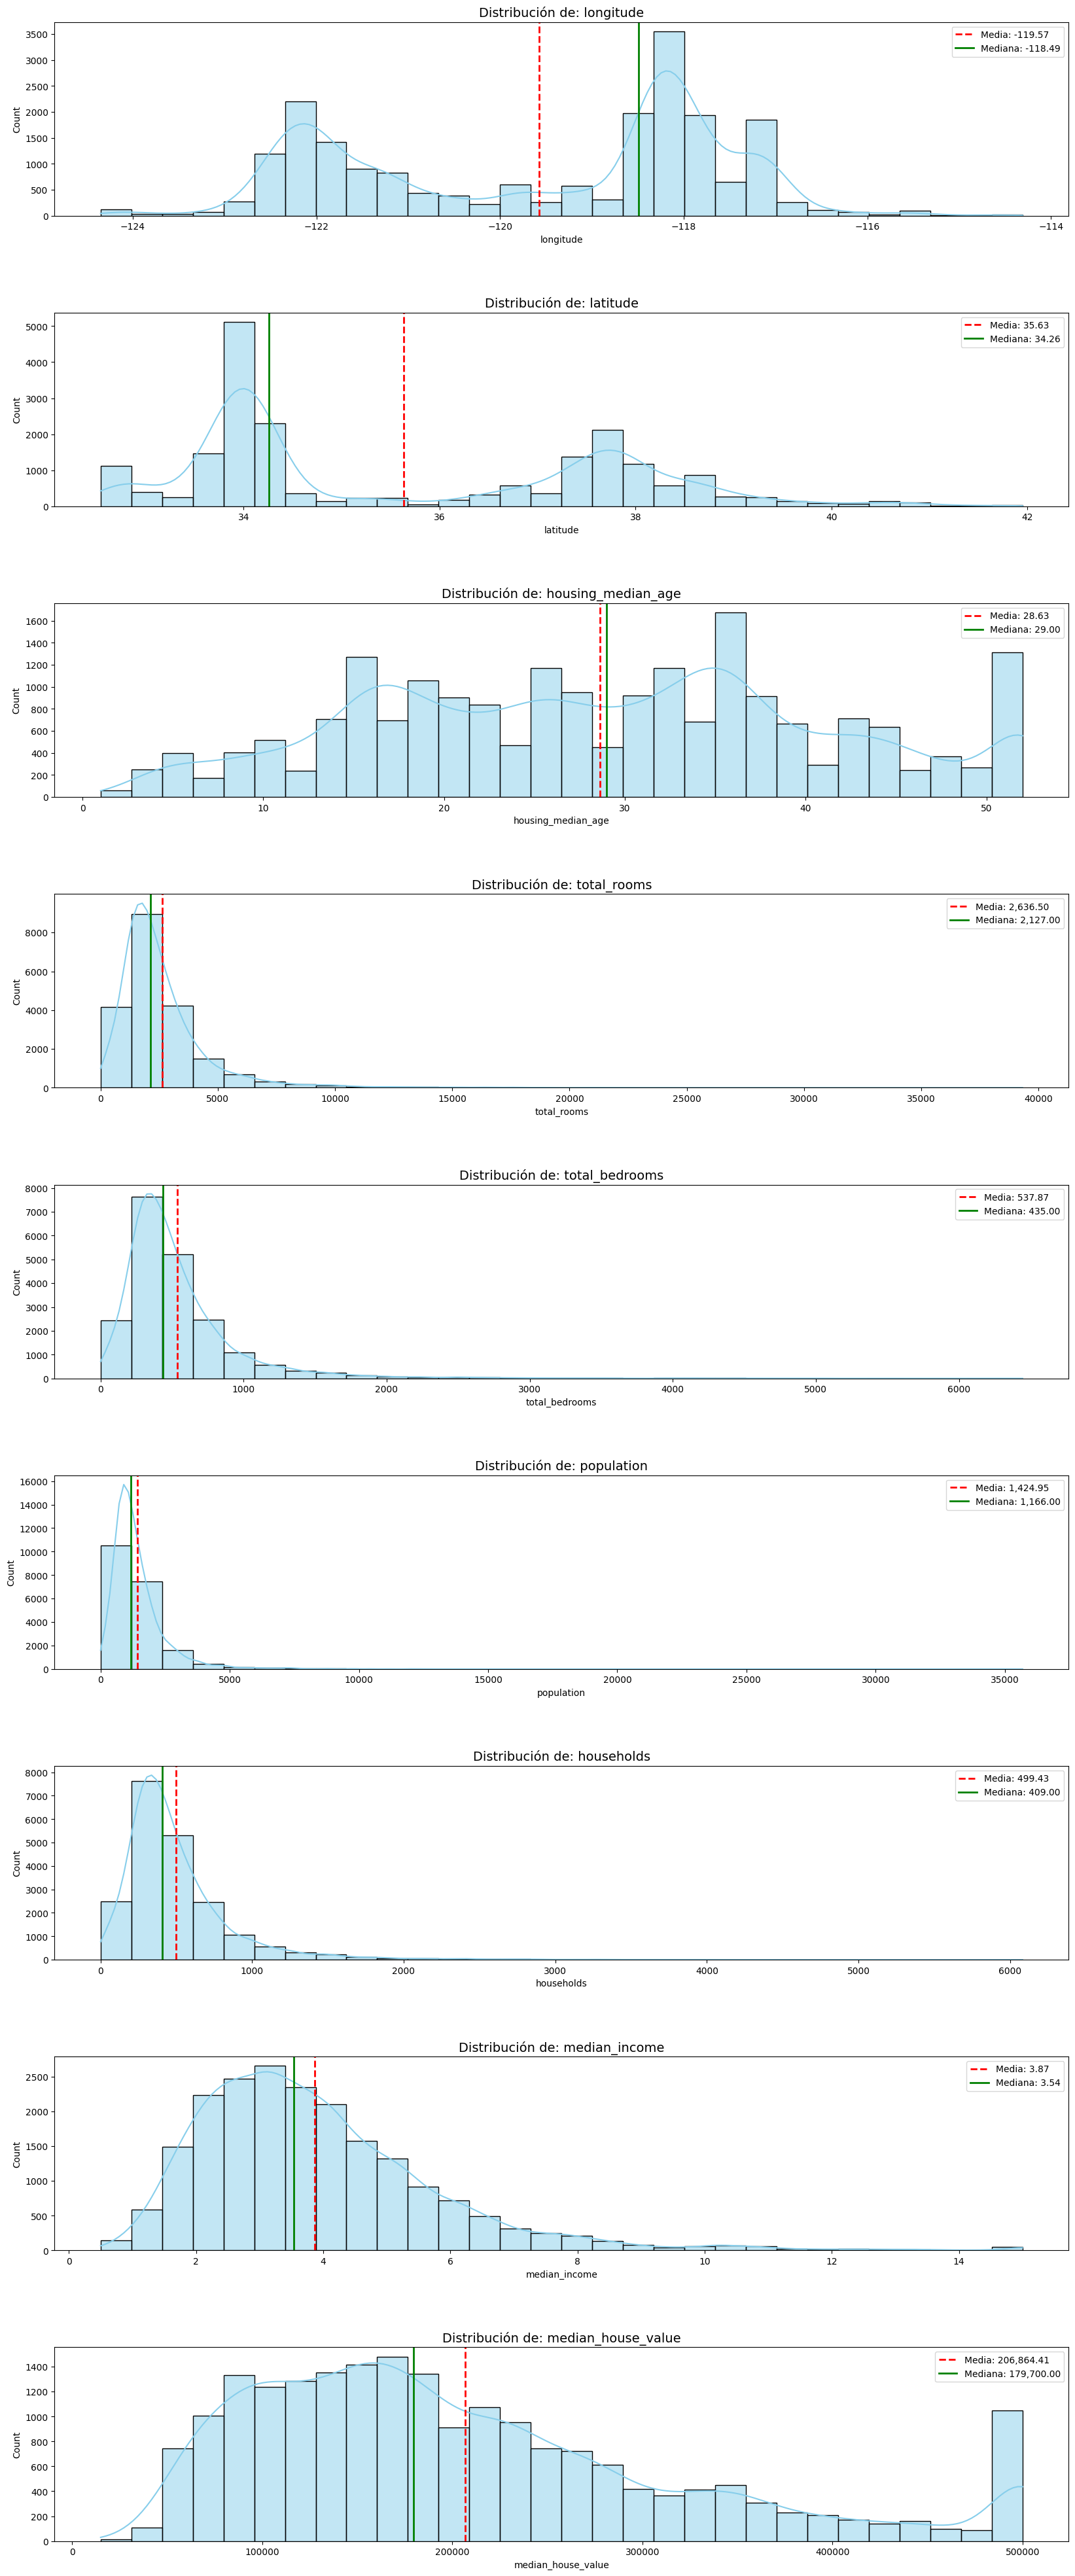

In [9]:
cols_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
fig, ax = plt.subplots(len(cols_num), ncols=1, figsize=(20,50))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    media = df_hs[col].mean()
    mediana = df_hs[col].median()

    sns.histplot(x=col, data=df_hs, kde=True, bins=30, color='skyblue', ax=ax[i])

    ax[i].axvline(
        media, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Media: {media:,.2f}' # Formato de número con 2 decimales
    )

    ax[i].axvline(
        mediana, 
        color='green', 
        linestyle='-', 
        linewidth=2,
        label=f'Mediana: {mediana:,.2f}' # Formato de número con 2 decimales
    )
    ax[i].set_title(f'Distribución de: {col}', fontsize=14)
    ax[i].legend()
plt.show()

## Calcular outliers total y limpiar el dataset
### Metodo Rango Intercualtilico(IQR)

In [10]:
# BORRAR DATOS DE LA COLUMANA median_house_value que tinen valores de 500000 para arriba

valor_maximo_dataset = df_hs['median_house_value'].max()

print(f"El valor exacto de la última barra (el límite superior) es: {valor_maximo_dataset}")

df_hs_limpio = df_hs[df_hs['median_house_value'] < 500001.0].copy()

print(f"Filas eliminadas (valor censurado): {len(df_hs) - len(df_hs_limpio)}")


El valor exacto de la última barra (el límite superior) es: 500001.0
Filas eliminadas (valor censurado): 958


In [11]:


# Función para aplicar Capping con IQR

def aplicar_capping_iqr(df, columnas):
    """Calcula y aplica el límite superior (capping) con el método IQR (1.5 * IQR)."""
    df_temp = df.copy()
    
    for col in columnas:
        Q1 = df_temp[col].quantile(0.25)
        Q3 = df_temp[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + (1.5 * IQR)
        
        # Aplicar capping: Los valores > Limite Superior se reemplazan por el Limite Superior
        filas_outlier = df_temp[df_temp[col] > limite_superior]
        num_outliers = len(filas_outlier)
        
        # Muestra un resumen de lo que se va a limitar
        print(f"Columna '{col}': Limite Superior: {limite_superior:,.2f}. Outliers limitados: {num_outliers}")
        
        # Reemplazar valores
        df_temp[col] = np.where(df_temp[col] > limite_superior, limite_superior, df_temp[col])
        
    return df_temp

# Lista de columnas a limpiar con Capping IQR
columnas_a_limpiar = [
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

# ¡Asegúrate de que df_hs_limpio sea el DataFrame que no contiene el valor censurado de median_house_value!
# Aplicar la función de capping
df_final = aplicar_capping_iqr(df_hs_limpio, columnas_a_limpiar)

# Ahora, recalcular los ratios con datos limpios
df_final['rooms_per_household'] = df_final['total_rooms'] / df_final['households']
df_final['bedroom_ratio'] = df_final['total_bedrooms'] / df_final['total_rooms']
df_final['population_per_household'] = df_final['population'] / df_final['households']

print("\nLimpieza de Outliers (Capping) y Recálculo de Ratios ¡Completado! 🎉")

df_final.info()


Columna 'total_rooms': Limite Superior: 5,633.50. Outliers limitados: 1247
Columna 'total_bedrooms': Limite Superior: 1,174.50. Outliers limitados: 1213
Columna 'population': Limite Superior: 3,163.50. Outliers limitados: 1118
Columna 'households': Limite Superior: 1,092.00. Outliers limitados: 1149
Columna 'median_income': Limite Superior: 7.67. Outliers limitados: 356

Limpieza de Outliers (Capping) y Recálculo de Ratios ¡Completado! 🎉
<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 19475 non-null  float64
 1   latitude                  19475 non-null  float64
 2   housing_median_age        19475 non-null  float64
 3   total_rooms               19475 non-null  float64
 4   total_bedrooms            19475 non-null  float64
 5   population                19475 non-null  float64
 6   household

# PROCESO DE ANALISIS DE DATOS
## Analisis exploratorio de Datos (EDA)
### 1. Analisis de correlacion

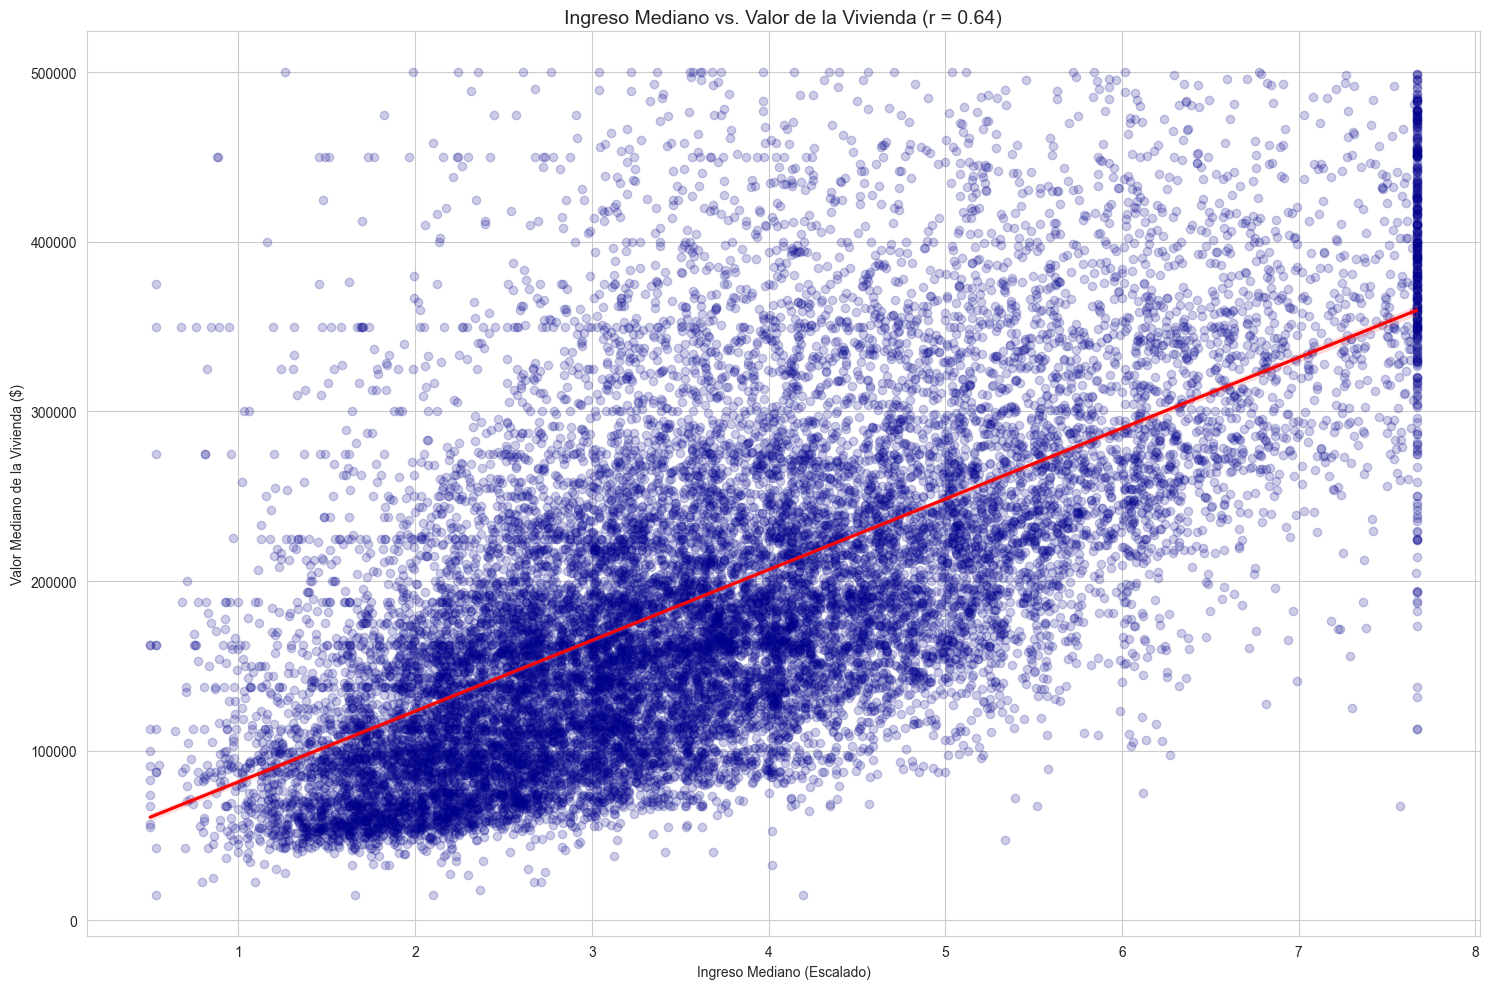

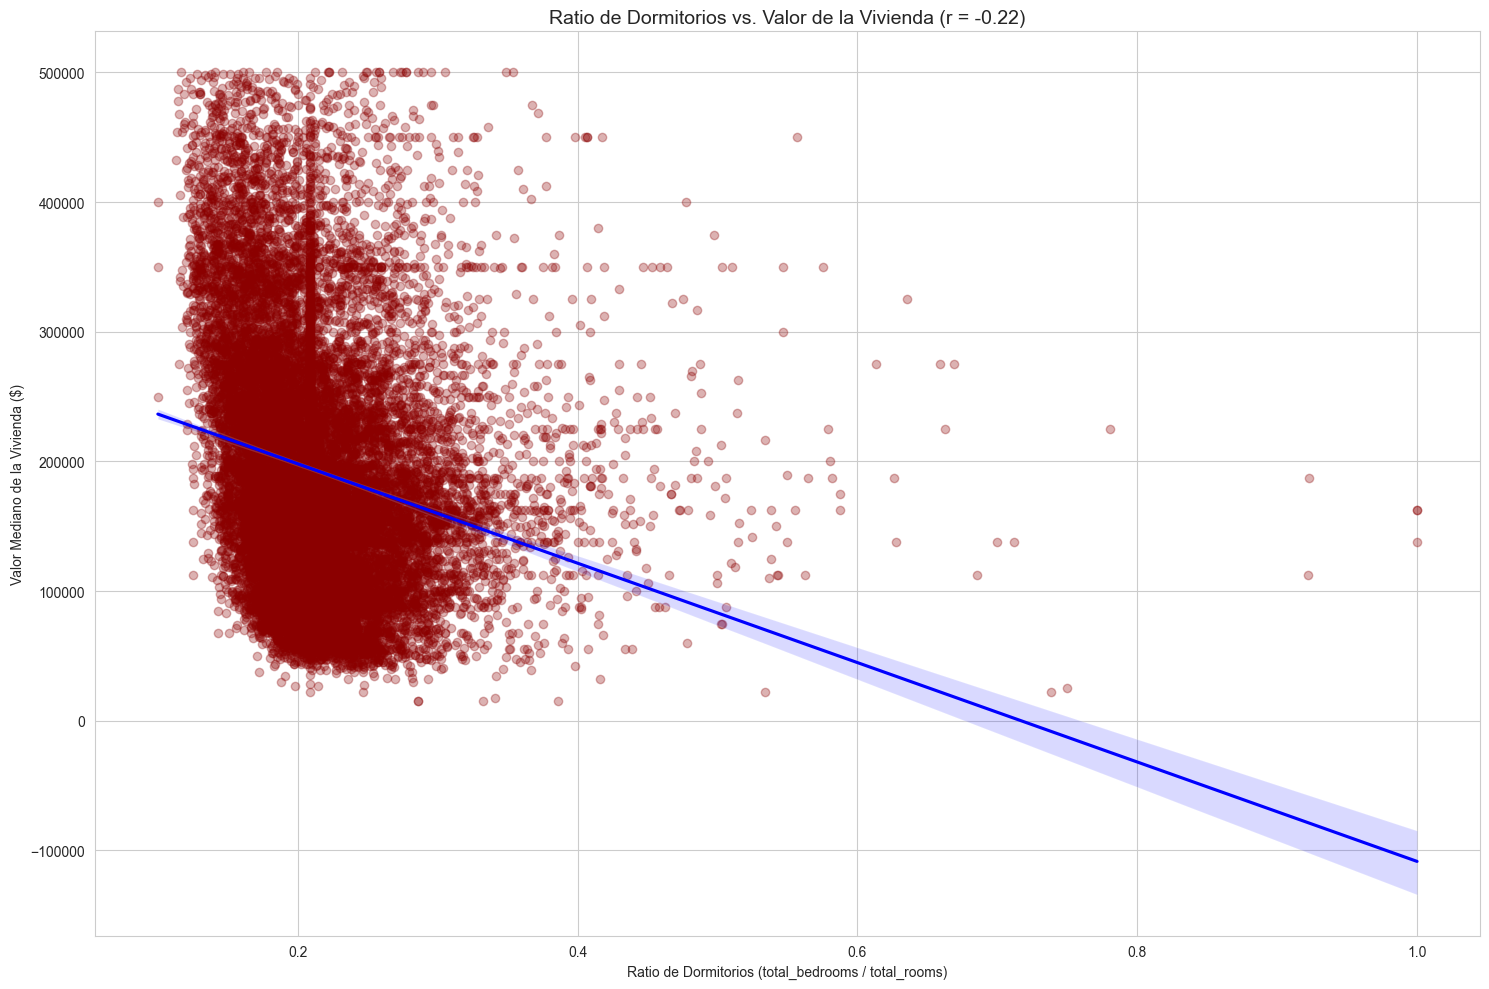

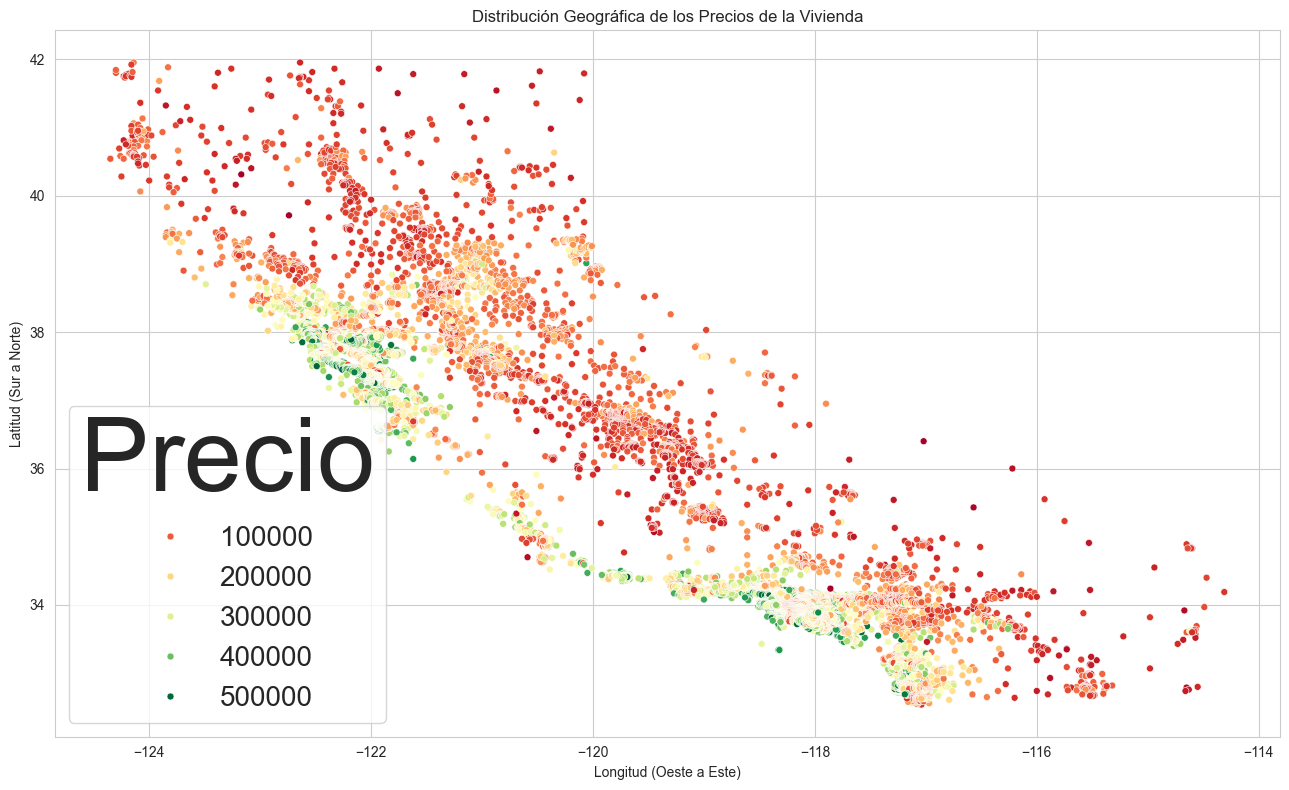

In [12]:
# Configuración básica para los gráficos
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (15, 10)

sns.regplot(
    x='median_income',
    y='median_house_value',
    data=df_final,
    scatter_kws={'alpha': 0.2, 'color': 'darkblue'}, # Parámetros para los puntos (scatter)
    line_kws={'color': 'red'},                        # Parámetros para la línea de regresión
    ci=95                                             # Banda de confianza del 95%
)
plt.title(f'Ingreso Mediano vs. Valor de la Vivienda (r = {df_final["median_income"].corr(df_final["median_house_value"]):.2f})', fontsize=14)
plt.xlabel('Ingreso Mediano (Escalado)')
plt.ylabel('Valor Mediano de la Vivienda ($)')
plt.tight_layout()
plt.show()


# --- 2. Gráfico de Correlación Negativa Fuerte: Ratio Dormitorio vs. Precio ---
plt.figure(figsize=(15, 10))
sns.regplot(
    x='bedroom_ratio',
    y='median_house_value',
    data=df_final,
    scatter_kws={'alpha': 0.3, 'color': 'darkred'},  # Parámetros para los puntos
    line_kws={'color': 'blue'},                       # Parámetros para la línea
    ci=95                                              # Banda de confianza del 95%
)
plt.title(f'Ratio de Dormitorios vs. Valor de la Vivienda (r = {df_final["bedroom_ratio"].corr(df_final["median_house_value"]):.2f})', fontsize=14)
plt.xlabel('Ratio de Dormitorios (total_bedrooms / total_rooms)')
plt.ylabel('Valor Mediano de la Vivienda ($)')
plt.tight_layout()
plt.show()

# --- 3. Gráfico Geográfico (Heatmap espacial) ---
# Muestra dónde se concentran los precios más altos.
plt.figure(figsize=(13, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_final,
    hue='median_house_value', # Colorea los puntos por el valor de la vivienda
    palette='RdYlGn',         # Esquema de color: Rojo (alto) a Verde (bajo)
    s=25,                     # Tamaño del punto
    alpha=1                 # Transparencia
)
plt.title('Distribución Geográfica de los Precios de la Vivienda', fontsize=12)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')
plt.legend(
    title='Precio',           # Título de la leyenda
    loc='lower left',         # Ubicación de la leyenda
    fontsize=20,              # Tamaño de la fuente de los valores de la leyenda
    title_fontsize=75         # Tamaño de la fuente del título de la leyenda
)
plt.tight_layout()
plt.show()

--- 1. Correlación de las variables con el Valor de la Vivienda ---
median_income               0.644533
total_rooms                 0.180791
households                  0.112263
rooms_per_household         0.103217
total_bedrooms              0.090019
housing_median_age          0.068595
population                  0.010865
population_per_household   -0.039221
longitude                  -0.046187
bedrooms_per_household     -0.061081
latitude                   -0.148637
bedroom_ratio              -0.215311
Name: median_house_value, dtype: float64


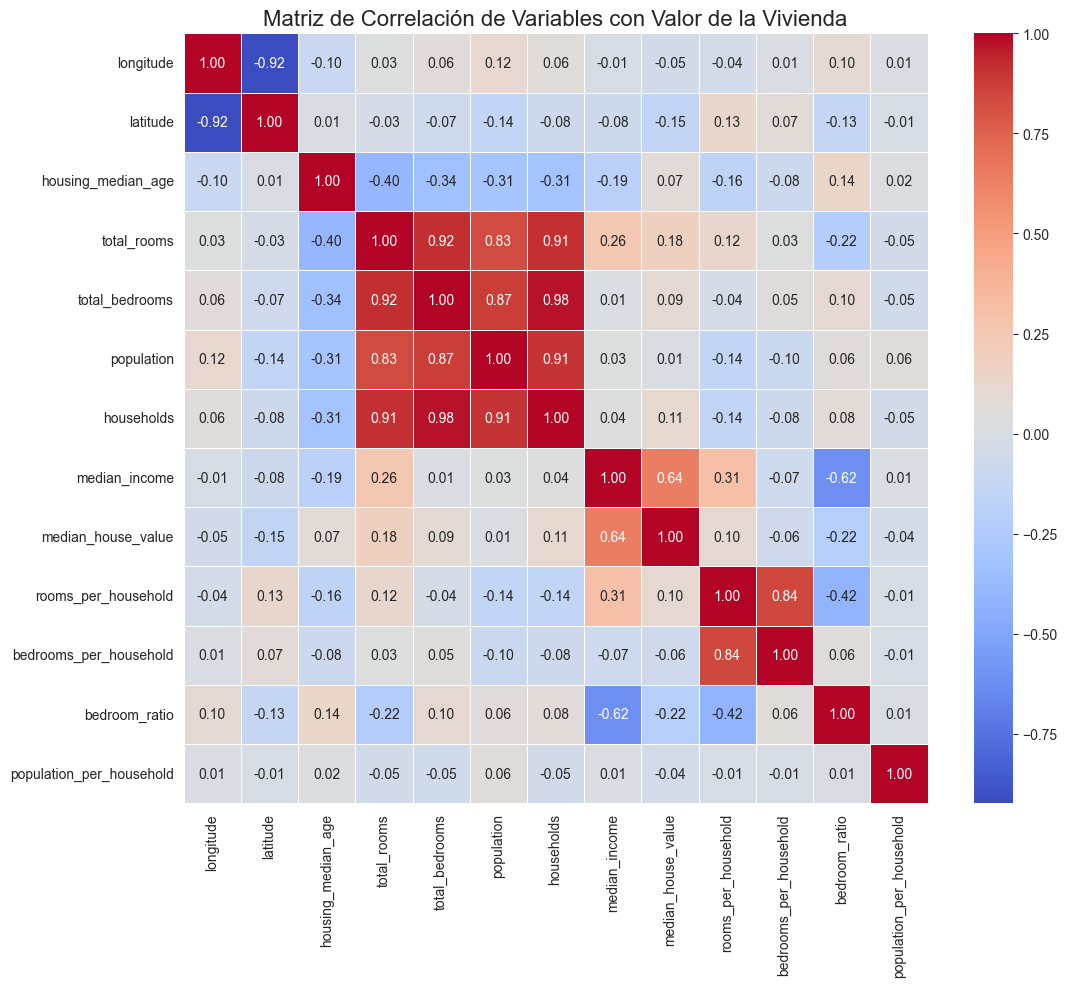

In [13]:
# ANALISIS DE CORRELACIONES DE DATOS

numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

# 1. Calcular la matriz de correlación completa
# El método .corr() calcula el coeficiente de Pearson entre todas las parejas de variables.
matriz_correlacion = df_final[numeric_columns].corr()

# --- Análisis: Correlación con la variable objetivo ---

print("--- 1. Correlación de las variables con el Valor de la Vivienda ---")

# Seleccionar la fila/columna de la variable objetivo y ordenarla
correlacion_con_precio = matriz_correlacion['median_house_value'].sort_values(ascending=False)

# Usamos .drop() para eliminar la correlación de la variable consigo misma (que siempre es 1.0)
print(correlacion_con_precio.drop('median_house_value'))

# --- Visualización: Mapa de Calor (Heatmap) ---

plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion,
    annot=True,          # Mostrar el valor del coeficiente en cada celda
    cmap='coolwarm',     # Esquema de color: rojo/azul para negativo/positivo
    fmt=".2f",           # Formato a dos decimales
    linewidths=.5,       # Líneas para separar las celdas
    cbar=True            # Mostrar la barra de color
)
plt.title('Matriz de Correlación de Variables con Valor de la Vivienda', fontsize=16)
plt.show()